# Tugas c-mean clustering
Implementasi Python yang 5 data di kelas
- 2 cluster
- tampilkan nilai pusat cluster dan keanggotaan setiap iterasi dan hitung fungsi objektif setiap iterasi

Implementasi Fuzzy C-Mean Untuk Data Iris (3 Cluster)
- data iris lakukan dengan 3 cluster tanpa outlier

### **Apa itu Fuzzy C-Means (C-Means)?**

Fuzzy C-Means (FCM) adalah salah satu metode *clustering* atau pengelompokan data yang bersifat **soft clustering**, yang berarti satu data dapat menjadi anggota lebih dari satu cluster dengan tingkat keanggotaan tertentu. FCM merupakan pengembangan dari algoritma **K-Means**, namun berbeda karena K-Means bersifat *hard clustering* di mana setiap data hanya menjadi anggota satu cluster secara tegas. FCM menggunakan prinsip fuzzy logic, sehingga memungkinkan data memiliki *derajat keanggotaan* pada lebih dari satu cluster.

### **Konsep Dasar Fuzzy C-Means Clustering**

Konsep dasar dari FCM adalah mempartisi sekumpulan data ke dalam sejumlah cluster yang telah ditentukan sebelumnya (misalnya `c` cluster), di mana setiap data memiliki *tingkat keanggotaan* (disebut **derajat keanggotaan** atau **membership**) terhadap masing-masing cluster.

Inti dari FCM adalah meminimalkan **fungsi objektif (objective function)** yang mengukur total jarak berbobot antara data dan pusat cluster-nya. Berat tersebut diperoleh dari pangkat `m` dari derajat keanggotaan, di mana `m` adalah **fuzziness parameter** yang mengatur seberapa kabur partisi antar cluster (biasanya `m = 2`).

### **Algoritma Fuzzy C-Means Clustering**

Langkah-langkah algoritma Fuzzy C-Means secara umum adalah sebagai berikut:

1. **Inisialisasi:**

   * Tentukan jumlah cluster `c`, parameter `m > 1`, batas toleransi `ε`, dan iterasi maksimum.
   * Inisialisasi matriks keanggotaan `U` secara acak, di mana elemen `u_ij` menunjukkan tingkat keanggotaan data ke-i terhadap cluster ke-j. Total keanggotaan setiap data harus sama dengan 1:

     $$
     \sum_{j=1}^{c} u_{ij} = 1
     $$

2. **Hitung Pusat Cluster (Centroid):**
   Untuk setiap cluster `j`, pusat cluster `v_j` dihitung dengan rumus:

   $$
   v_j = \frac{\sum_{i=1}^{n} (u_{ij})^m \cdot x_i}{\sum_{i=1}^{n} (u_{ij})^m}
   $$

   Di mana `x_i` adalah data ke-i dan `u_ij` adalah derajat keanggotaan.

3. **Update Derajat Keanggotaan (Membership):**
   Untuk setiap data dan cluster, keanggotaan diperbarui dengan:

   $$
   u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

4. **Evaluasi Konvergensi:**

   * Hitung selisih antara matriks keanggotaan baru dan lama.
   * Jika perubahan lebih kecil dari `ε`, maka iterasi berhenti (konvergen); jika tidak, ulangi dari langkah 2.

5. **Output:**

   * Pusat-pusat cluster (`v_j`)
   * Matriks keanggotaan (`U`)
   * Nilai fungsi objektif (total jarak berpemberat)

## Implementasi Python 5 data di atas
- 2 cluster
- tampilkan nilai pusat cluster dan keanggotaan setiap iterasi dan hitung fungsi objektif setiap iterasi

In [ ]:
import numpy as np
import pandas as pd

# Data awal
data = {
    'f1': [1, 2, 3, 6, 7],
    'f2': [2, 3, 4, 7, 8],
    'dc1': [0.3, 0.2, 0.4, 0.7, 0.1],
    'dc2': [0.7, 0.8, 0.6, 0.3, 0.9]
}
df = pd.DataFrame(data)

# Parameter
m = 2.0
max_iter = 10
epsilon = 1e-4

# Fungsi menghitung centroid
def calculate_centroid(df, membership_col, m):
    u_m = df[membership_col] ** m
    v1 = (u_m * df['f1']).sum() / u_m.sum()
    v2 = (u_m * df['f2']).sum() / u_m.sum()
    return np.round((v1, v2), 2)

# Fungsi menghitung fungsi objektif
def calculate_J(df, centroid, membership_col, m):
    u_m = df[membership_col] ** m
    distances = (df['f1'] - centroid[0]) ** 2 + (df['f2'] - centroid[1]) ** 2
    return np.round((u_m * distances).sum(), 4)

# Fungsi menghitung jarak Euclidean
def euclidean_distance(x, centroid):
    return np.sqrt((x[0] - centroid[0])**2 + (x[1] - centroid[1])**2)

# Iterasi Fuzzy C-Means
for i in range(max_iter):
    print(f"\nIterasi {i+1}:")

    # Hitung centroid
    c1 = calculate_centroid(df, 'dc1', m)
    c2 = calculate_centroid(df, 'dc2', m)
    print(f"Centroid Cluster 1: {c1}")
    print(f"Centroid Cluster 2: {c2}")

    # Hitung fungsi objektif
    J1 = calculate_J(df, c1, 'dc1', m)
    J2 = calculate_J(df, c2, 'dc2', m)
    J_total = np.round(J1 + J2, 4)
    print(f"J1 (Cluster 1): {J1}")
    print(f"J2 (Cluster 2): {J2}")
    print(f"Fungsi Objektif Total (J): {J_total}")

    # Tampilkan keanggotaan
    print("Derajat Keanggotaan:")
    print(df[['dc1', 'dc2']])

    # Hitung keanggotaan baru
    new_dc1 = []
    new_dc2 = []
    for _, row in df.iterrows():
        x = (row['f1'], row['f2'])
        d1 = euclidean_distance(x, c1)
        d2 = euclidean_distance(x, c2)
        if d1 == 0:
            u1, u2 = 1.0, 0.0
        elif d2 == 0:
            u1, u2 = 0.0, 1.0
        else:
            denom1 = (d1 / d1) ** (2 / (m - 1)) + (d1 / d2) ** (2 / (m - 1))
            denom2 = (d2 / d1) ** (2 / (m - 1)) + (d2 / d2) ** (2 / (m - 1))
            u1 = 1 / denom1
            u2 = 1 / denom2
        new_dc1.append(np.round(u1, 4))
        new_dc2.append(np.round(u2, 4))

    # Konvergensi?
    if np.allclose(df['dc1'], new_dc1, atol=epsilon) and np.allclose(df['dc2'], new_dc2, atol=epsilon):
        print("Konvergen. Iterasi dihentikan.")
        break

    # Update keanggotaan
    df['dc1'] = new_dc1
    df['dc2'] = new_dc2



Iterasi 1:
Centroid Cluster 1: [4.63 5.63]
Centroid Cluster 2: [3.79 4.79]
J1 (Cluster 1): 5.7271
J2 (Cluster 2): 29.7508
Fungsi Objektif Total (J): 35.4779
Derajat Keanggotaan:
   dc1  dc2
0  0.3  0.7
1  0.2  0.8
2  0.4  0.6
3  0.7  0.3
4  0.1  0.9

Iterasi 2:
Centroid Cluster 1: [5.36 6.36]
Centroid Cluster 2: [2.69 3.69]
J1 (Cluster 1): 10.5912
J2 (Cluster 2): 9.1407
Fungsi Objektif Total (J): 19.7319
Derajat Keanggotaan:
      dc1     dc2
0  0.3714  0.6286
1  0.3166  0.6834
2  0.1902  0.8098
3  0.7224  0.2776
4  0.6472  0.3528

Iterasi 3:
Centroid Cluster 1: [6.39 7.39]
Centroid Cluster 2: [2.11 3.11]
J1 (Cluster 1): 1.9114
J2 (Cluster 2): 4.2202
Fungsi Objektif Total (J): 6.1316
Derajat Keanggotaan:
      dc1     dc2
0  0.1306  0.8694
1  0.0405  0.9595
2  0.0170  0.9830
3  0.9640  0.0360
4  0.8735  0.1265

Iterasi 4:
Centroid Cluster 1: [6.49 7.49]
Centroid Cluster 2: [1.98 2.98]
J1 (Cluster 1): 1.1763
J2 (Cluster 2): 3.6045
Fungsi Objektif Total (J): 4.7808
Derajat Keanggotaan:


 implementasi manual dari algoritma Fuzzy C-Means (FCM) untuk melakukan proses clustering terhadap data dua dimensi ke dalam dua cluster. dalam FCM, setiap data tidak secara mutlak hanya termasuk ke satu cluster, melainkan memiliki derajat keanggotaan pada masing-masing cluster. Di awal, data dimuat dalam bentuk DataFrame dengan dua fitur (f1 dan f2) serta nilai awal derajat keanggotaan terhadap dua cluster (dc1 dan dc2).

Selanjutnya, sejumlah parameter ditetapkan seperti m (nilai fuzziness, biasanya bernilai 2), max_iter (jumlah maksimal iterasi), dan epsilon (ambang batas perubahan keanggotaan untuk menentukan konvergensi). Di dalam perulangan iterasi, centroid masing-masing cluster dihitung berdasarkan rumus weighted mean menggunakan derajat keanggotaan berpangkat m. Kemudian, fungsi objektif J dihitung sebagai jumlah dari total jarak Euclidean berbobot dari setiap data terhadap centroid masing-masing cluster, dan nilai ini dicetak agar dapat dipantau per iterasi. Setelah itu, keanggotaan masing-masing data terhadap setiap cluster diperbarui berdasarkan jarak Euclidean ke masing-masing centroid. Jika suatu titik data memiliki jarak nol terhadap salah satu centroid, maka keanggotaannya dianggap penuh pada cluster tersebut. Perubahan nilai keanggotaan dibandingkan dengan nilai sebelumnya untuk mengecek apakah sudah konvergen. Jika tidak ada perubahan yang signifikan (kurang dari epsilon), maka iterasi dihentikan. Dengan demikian, kode ini menggambarkan bagaimana FCM bekerja secara bertahap dan fleksibel dalam mengelompokkan data, di mana proses klasterisasi tidak dilakukan secara tegas melainkan berdasarkan derajat keanggotaan.

## Implementasi Fuzzy C-Mean Untuk Data Iris (3 Cluster)
- data iris lakukan dengan 3 cluster tanpa outlier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# Load dan normalisasi data Iris
iris = load_iris()
X = iris.data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Parameter FCM
n_clusters = 3
m = 2.0
max_iter = 100
epsilon = 1e-5
np.random.seed(42)

n_samples = X.shape[0]

# Inisialisasi keanggotaan acak
U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)

# Fungsi menghitung centroid
def update_centroids(U, X, m):
    um = U ** m
    return (um.T @ X) / um.sum(axis=0)[:, None]

# Fungsi update keanggotaan
def update_membership(X, centroids, m):
    dist = pairwise_distances(X, centroids) + 1e-10  # Hindari div 0
    power = 2 / (m - 1)
    tmp = dist[:, :, None] / dist[:, None, :]
    tmp = tmp ** power
    denom = tmp.sum(axis=2)
    return 1 / denom

# Iterasi FCM
for iteration in range(1, max_iter + 1):
    centroids = update_centroids(U, X, m)
    U_new = update_membership(X, centroids, m)

    # Hitung fungsi objektif
    dist = pairwise_distances(X, centroids) ** 2
    J = np.sum((U_new ** m) * dist)

    # Output per iterasi
    print(f"\nIterasi {iteration}")
    for i, c in enumerate(centroids):
        print(f"  Centroid Cluster {i+1}: {np.round(c, 4)}")
    print(f"  Fungsi Objektif: {J:.4f}")

    # Cek konvergensi
    if np.linalg.norm(U_new - U) < epsilon:
        print("\nKonvergen, iterasi dihentikan.")
        break
    U = U_new



Iterasi 1
  Centroid Cluster 1: [0.4908 0.4184 0.5369 0.5312]
  Centroid Cluster 2: [0.4307 0.4418 0.475  0.4623]
  Centroid Cluster 3: [0.3702 0.4647 0.3841 0.3718]
  Fungsi Objektif: 12.7600

Iterasi 2
  Centroid Cluster 1: [0.5312 0.4007 0.6163 0.6077]
  Centroid Cluster 2: [0.4244 0.4254 0.4796 0.4688]
  Centroid Cluster 3: [0.2789 0.5174 0.2294 0.2159]
  Fungsi Objektif: 9.0055

Iterasi 3
  Centroid Cluster 1: [0.5847 0.3922 0.6904 0.6917]
  Centroid Cluster 2: [0.4295 0.3498 0.5406 0.5176]
  Centroid Cluster 3: [0.206  0.5764 0.101  0.084 ]
  Fungsi Objektif: 5.8690

Iterasi 4
  Centroid Cluster 1: [0.6269 0.4091 0.734  0.7526]
  Centroid Cluster 2: [0.4272 0.3161 0.5566 0.5212]
  Centroid Cluster 3: [0.1962 0.5882 0.0838 0.0651]
  Fungsi Objektif: 5.3713

Iterasi 5
  Centroid Cluster 1: [0.6513 0.4254 0.7548 0.7831]
  Centroid Cluster 2: [0.4264 0.3064 0.5574 0.5187]
  Centroid Cluster 3: [0.1958 0.5899 0.0825 0.0637]
  Fungsi Objektif: 5.2563

Iterasi 6
  Centroid Cluster 1: [

Implementasikan algoritma Fuzzy C-Means (FCM) untuk melakukan clustering pada dataset Iris. Pertama, data Iris dimuat menggunakan load_iris() dari sklearn.datasets, lalu dinormalisasi menggunakan MinMaxScaler agar semua fitur berada dalam rentang [0, 1]. FCM membutuhkan jumlah cluster yang ditentukan sebelumnya, dalam hal ini n_clusters = 3, sesuai dengan jumlah spesies bunga dalam dataset Iris. Parameter fuzziness m diatur ke 2.0, yang merupakan nilai umum untuk menunjukkan tingkat keburaman klasifikasi.

Langkah awal FCM adalah menginisialisasi matriks keanggotaan U secara acak dengan nilai-nilai yang memenuhi sifat fuzzy: total keanggotaan dari sebuah data ke semua cluster harus berjumlah 1. Fungsi update_centroids() digunakan untuk menghitung posisi baru dari pusat (centroid) tiap cluster berdasarkan matriks keanggotaan yang ada. Perhitungan ini memperhitungkan pangkat m dari nilai keanggotaan agar cluster yang memiliki keanggotaan lebih tinggi memberi pengaruh lebih besar pada posisi centroid.

Kemudian, fungsi update_membership() digunakan untuk memperbarui matriks keanggotaan berdasarkan jarak dari masing-masing data ke centroid terbaru. Jarak ini dihitung menggunakan Euclidean distance melalui pairwise_distances() dari scikit-learn. Derajat keanggotaan dihitung berdasarkan rasio jarak suatu data ke seluruh centroid, dan diformulasikan untuk menghasilkan nilai fuzzy yang proporsional.

Proses iterasi dilakukan hingga mencapai batas iterasi maksimum (max_iter) atau konvergen, yaitu ketika perubahan antara keanggotaan sebelumnya dan saat ini sangat kecil (kurang dari epsilon = 1e-5). Di setiap iterasi, fungsi objektif (objective function) J dihitung untuk memantau apakah proses optimasi berjalan menuju hasil yang lebih baik. Fungsi objektif ini menunjukkan seberapa baik pembagian data ke cluster saat ini, dan nilai J akan terus menurun seiring konvergensi algoritma.

Setiap iterasi akan mencetak centroid tiap cluster dan nilai fungsi objektif J, sehingga pengguna dapat memantau proses konvergensi. Jika perubahan keanggotaan sangat kecil, iterasi akan dihentikan lebih awal dan dicetak pesan bahwa algoritma telah konvergen.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Kode diatas adalah import library yang digunakan untuk memvisualisasikan hasil clustering dari data Iris menggunakan 2D dan 3D plot

In [ ]:
# Load data Iris
iris = load_iris()
X = iris.data

# Parameter FCM
n_clusters = 3
m = 2.0
max_iter = 100
epsilon = 1e-5

# Inisialisasi derajat keanggotaan acak (sum 1 per baris)
np.random.seed(42)
U = np.random.dirichlet(np.ones(n_clusters), size=X.shape[0])

# Update centroid berdasarkan keanggotaan
def update_centroids(X, U, m):
    um = U ** m
    centroids = (um.T @ X) / um.sum(axis=0)[:, None]
    return centroids

# Update keanggotaan berdasarkan centroid
def update_membership(X, centroids, m):
    dist = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
    dist = np.fmax(dist, np.finfo(np.float64).eps)  # hindari pembagian nol
    inv_dist = 1.0 / dist
    power = 2 / (m - 1)
    denom = (inv_dist[:, :, None] / inv_dist[:, None, :]) ** power
    U_new = 1.0 / denom.sum(axis=2)
    return U_new

for iteration in range(max_iter):
    centroids = update_centroids(X, U, m)
    U_new = update_membership(X, centroids, m)

    # Cek konvergensi
    if np.linalg.norm(U_new - U) < epsilon:
        print(f"Konvergen di iterasi ke-{iteration + 1}")
        break
    U = U_new

# Label final berdasarkan keanggotaan tertinggi
labels = np.argmax(U, axis=1)

# PCA untuk visualisasi 2D dan 3D
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
centroids_2d = pca_2d.transform(centroids)

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)
centroids_3d = pca_3d.transform(centroids)



kode diatas untuk menampilkan visualisasi hasil clustering Fuzzy C-Means (FCM) dalam 2D dan 3D menggunakan hasil reduksi dimensi dari PCA.

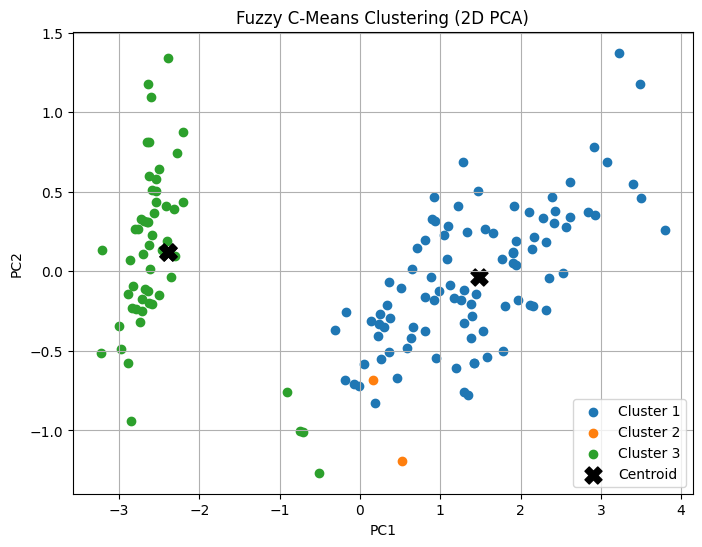

In [ ]:
# Visualisasi 2D
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_2d[labels == i, 0], X_2d[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='X', s=150, label='Centroid')
plt.title('Fuzzy C-Means Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


kode diatas untuk menampilkan visualisasi 2D dari hasil clustering Fuzzy C-Means yang telah direduksi dimensinya menggunakan PCA (Principal Component Analysis).

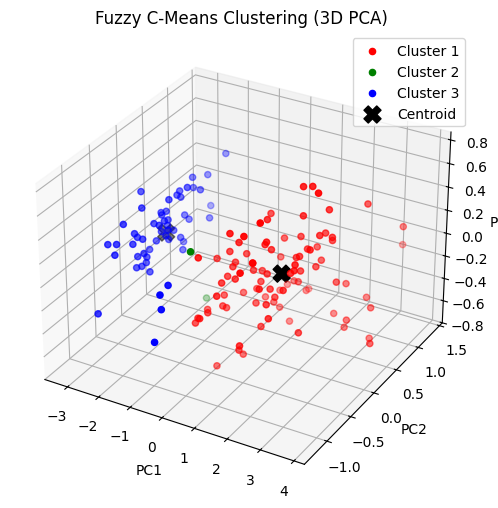

In [ ]:
# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for i in range(n_clusters):
    ax.scatter(X_3d[labels == i, 0], X_3d[labels == i, 1], X_3d[labels == i, 2],
               color=colors[i], label=f'Cluster {i+1}')
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
           c='black', marker='X', s=150, label='Centroid')
ax.set_title('Fuzzy C-Means Clustering (3D PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


kode diatas untuk menampilkan hasil clustering Fuzzy C-Means dalam bentuk visualisasi 3D, menggunakan data Iris yang telah direduksi ke 3 dimensi dengan PCA. Visualisasi ini dibuat untuk menggambarkan hasil dari proses clustering Fuzzy C-Means pada data Iris ke dalam ruang tiga dimensi. Setelah melakukan reduksi dimensi dengan PCA menjadi tiga komponen utama (PC1, PC2, PC3), setiap titik data direpresentasikan dalam ruang 3D berdasarkan hasil clustering.

Plot 3D dibuat dengan menggunakan matplotlib dan objek Axes3D. Masing-masing cluster divisualisasikan menggunakan warna berbeda (red, green, blue), dan titik-titik data pada masing-masing cluster dikelompokkan berdasarkan label hasil dari np.argmax(U, axis=1)—yakni keanggotaan tertinggi dari setiap data terhadap salah satu cluster.

Centroid dari setiap cluster ditampilkan dengan simbol "X" berwarna hitam dan ukuran besar (s=150), menandakan posisi pusat dari masing-masing cluster dalam ruang 3 dimensi. Selain itu, plot dilengkapi dengan label sumbu (PC1, PC2, PC3), judul grafik, serta legenda untuk memudahkan interpretasi.

Dengan ini bisa lihat secara langsung bagaimana Fuzzy C-Means membentuk cluster dalam data, dan bagaimana penyebaran data terhadap masing-masing centroid.

